In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

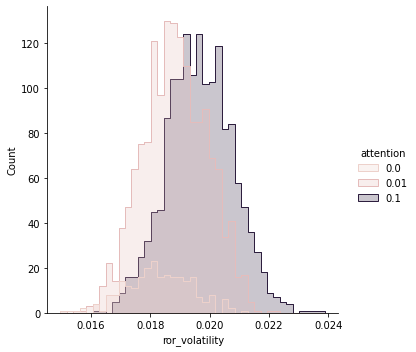

In [2]:
import seaborn as sns

rdata = pd.read_csv("out/study-AZURE-2021-Jul-12.csv")
rdata = rdata.drop(columns="Unnamed: 0")

rdata["att_cat"] = rdata['attention'].apply(lambda x: str(x) + ' ')
rdata["mock"] = rdata['seconds'] < 100

data = rdata[~rdata["mock"]]
 
sns.displot(
    data, 
    x="ror_volatility", 
    hue="attention", 
    element='step'
)

In [15]:
1500 / 25

60.0

In [3]:

data001 = data[data['attention'] == 0.01]

array([[<AxesSubplot:title={'center':'seconds'}>]], dtype=object)

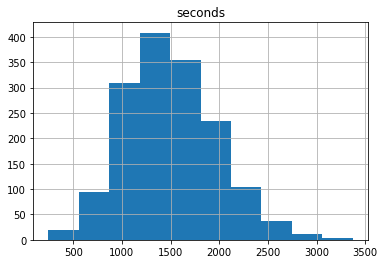

In [4]:
data001[['seconds']].hist()

$Q$ number of quarters
$R$ runs per quarter
$G$ points on the grid
$N$ is samples per gridpoint.

We are collecting $GN$ samples. Runtime is (very) roughly proportional to $QR$

In [5]:
data.columns

Index(['('aLvl_mean', 'CRRA: 3.33, DiscFac: 0.95')',
       '('aLvl_mean', 'CRRA: 3.33, DiscFac: 0.97')',
       '('aLvl_mean', 'CRRA: 6.0, DiscFac: 0.95')',
       '('aLvl_mean', 'CRRA: 6.0, DiscFac: 0.97')',
       '('aLvl_mean', 'CRRA: 8.67, DiscFac: 0.95')',
       '('aLvl_mean', 'CRRA: 8.67, DiscFac: 0.97')',
       '('aLvl_std', 'CRRA: 3.33, DiscFac: 0.95')',
       '('aLvl_std', 'CRRA: 3.33, DiscFac: 0.97')',
       '('aLvl_std', 'CRRA: 6.0, DiscFac: 0.95')',
       '('aLvl_std', 'CRRA: 6.0, DiscFac: 0.97')',
       '('aLvl_std', 'CRRA: 8.67, DiscFac: 0.95')',
       '('aLvl_std', 'CRRA: 8.67, DiscFac: 0.97')', 'q', 'r', 'market_class',
       'market_seeds', 'attention', 'ror_volatility', 'dividend_ror',
       'dividend_std', 'p1', 'p2', 'delta_t1', 'delta_t2', 'seconds',
       'att_cat', 'mock'],
      dtype='object')

In [6]:
data[['q','r']]

,q,r
11,8,20
12,8,20
14,8,20
29,8,20
32,8,20
...,...,...
4709,8,20
4710,8,20
4711,8,20
4712,8,20


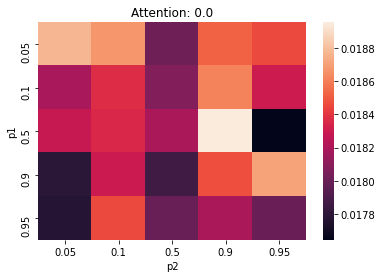

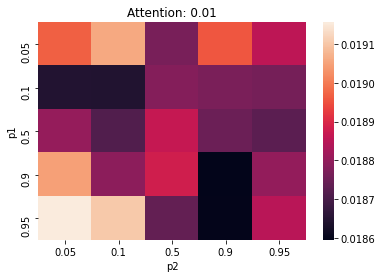

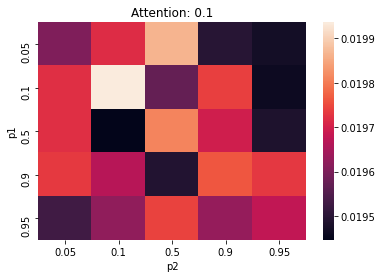

In [7]:
for attention in np.sort(data['attention'].unique()):
    adata = data[data['attention'] == attention]
    hdata_mean = pd.DataFrame(adata.groupby(['p1','p2']).mean()['ror_volatility']).reset_index().pivot(
        index="p1",columns="p2", values="ror_volatility")

    plt.figure()
    ax = sns.heatmap(hdata_mean)
    ax.set_title(f"Attention: {attention}")

Wealth mean
('aLvl_mean', 'CRRA: 8.67, DiscFac: 0.95')


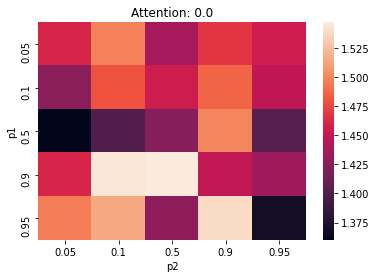

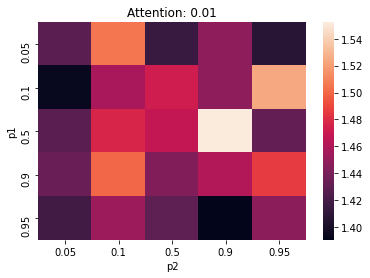

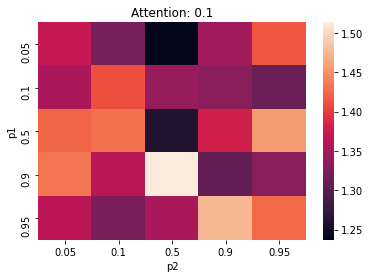

In [8]:
value = data.columns[4]

print("Wealth mean")
print(value)

for attention in np.sort(data['attention'].unique()):
    adata = data[data['attention'] == attention]
    hdata_mean = pd.DataFrame(adata.groupby(['p1','p2']).mean()[value]).reset_index().pivot(
        index="p1",columns="p2", values=value)

    plt.figure()
    ax = sns.heatmap(hdata_mean)
    ax.set_title(f"Attention: {attention}")

Wealth std
('aLvl_mean', 'CRRA: 8.67, DiscFac: 0.95')


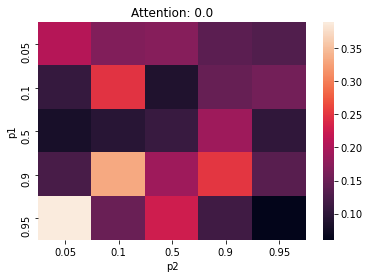

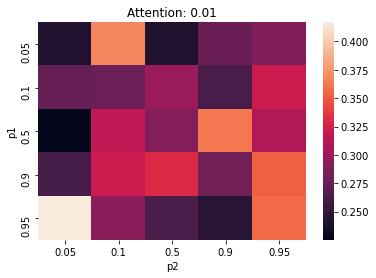

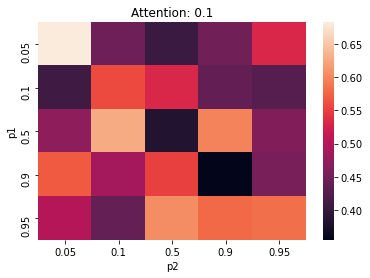

In [9]:
value = data.columns[4]

print("Wealth std")
print(value)

for attention in np.sort(data['attention'].unique()):
    adata = data[data['attention'] == attention]
    hdata_mean = pd.DataFrame(adata.groupby(['p1','p2'])[value].std()).reset_index().pivot(
        index="p1",columns="p2", values=value)

    plt.figure()
    ax = sns.heatmap(hdata_mean)
    ax.set_title(f"Attention: {attention}")